In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import math
import seaborn as sns

In [347]:
# فراخواني ديتاست ها

In [348]:
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [349]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv('test.csv')
data_test.drop('id',axis=1,inplace=True)
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [350]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [352]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [353]:
# نمايش نمودارها
#بدليل سنگين نشدن کد و سرعت پردازش بالاتر فقط از چند نمودار استفاده شده است

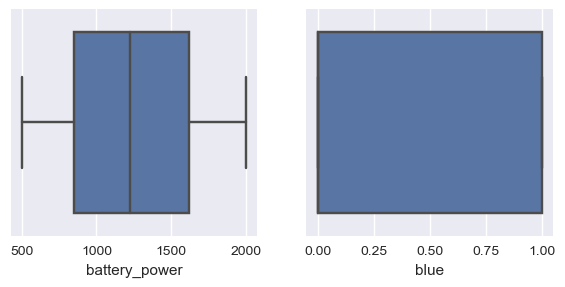

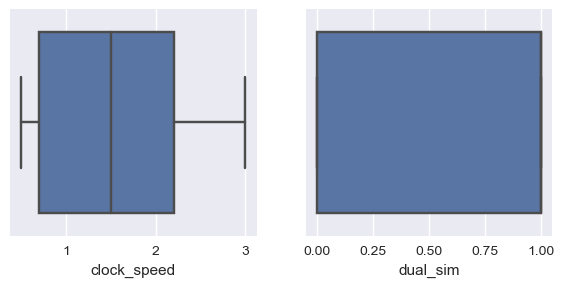

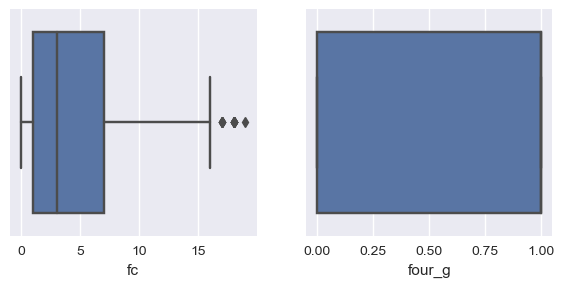

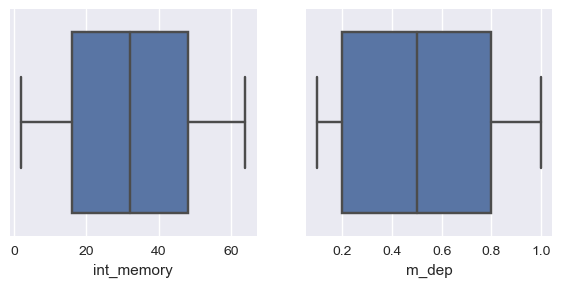

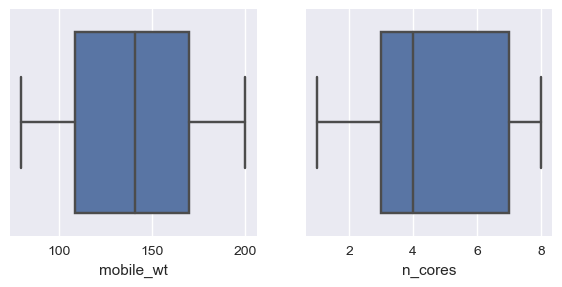

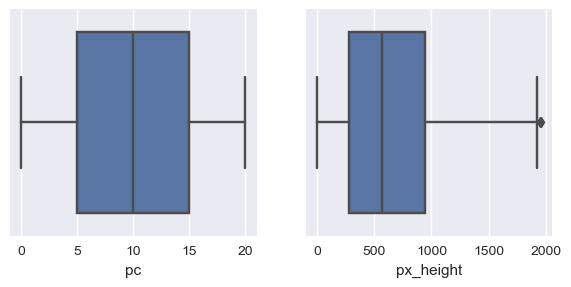

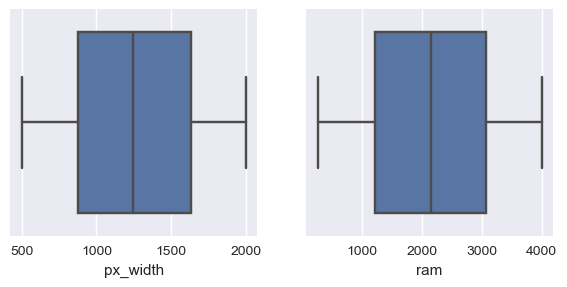

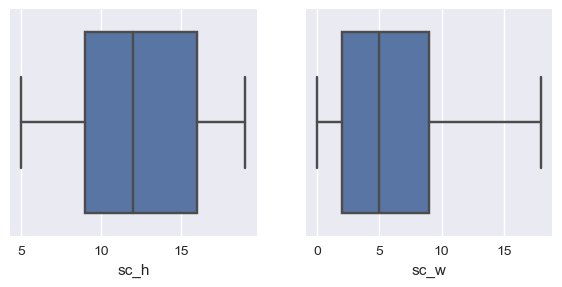

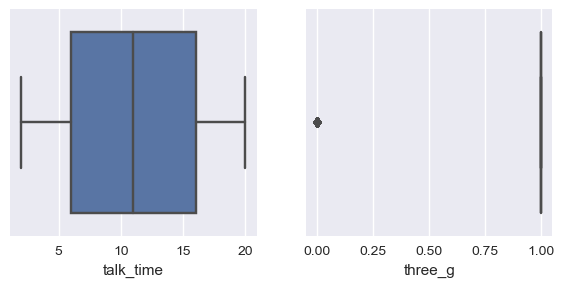

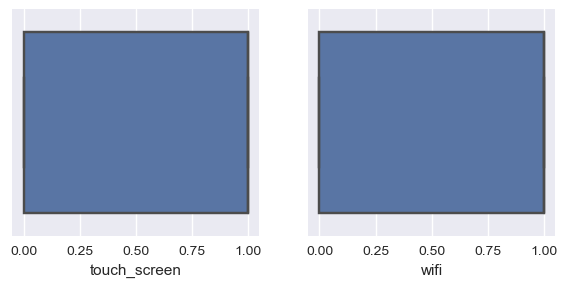

In [354]:
numerical=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
i=0
while i<20:
    fig=plt.figure(figsize=[7,3],dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i],data=data)
    i=i+1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i],data=data)
    i=i+1
    plt.show()

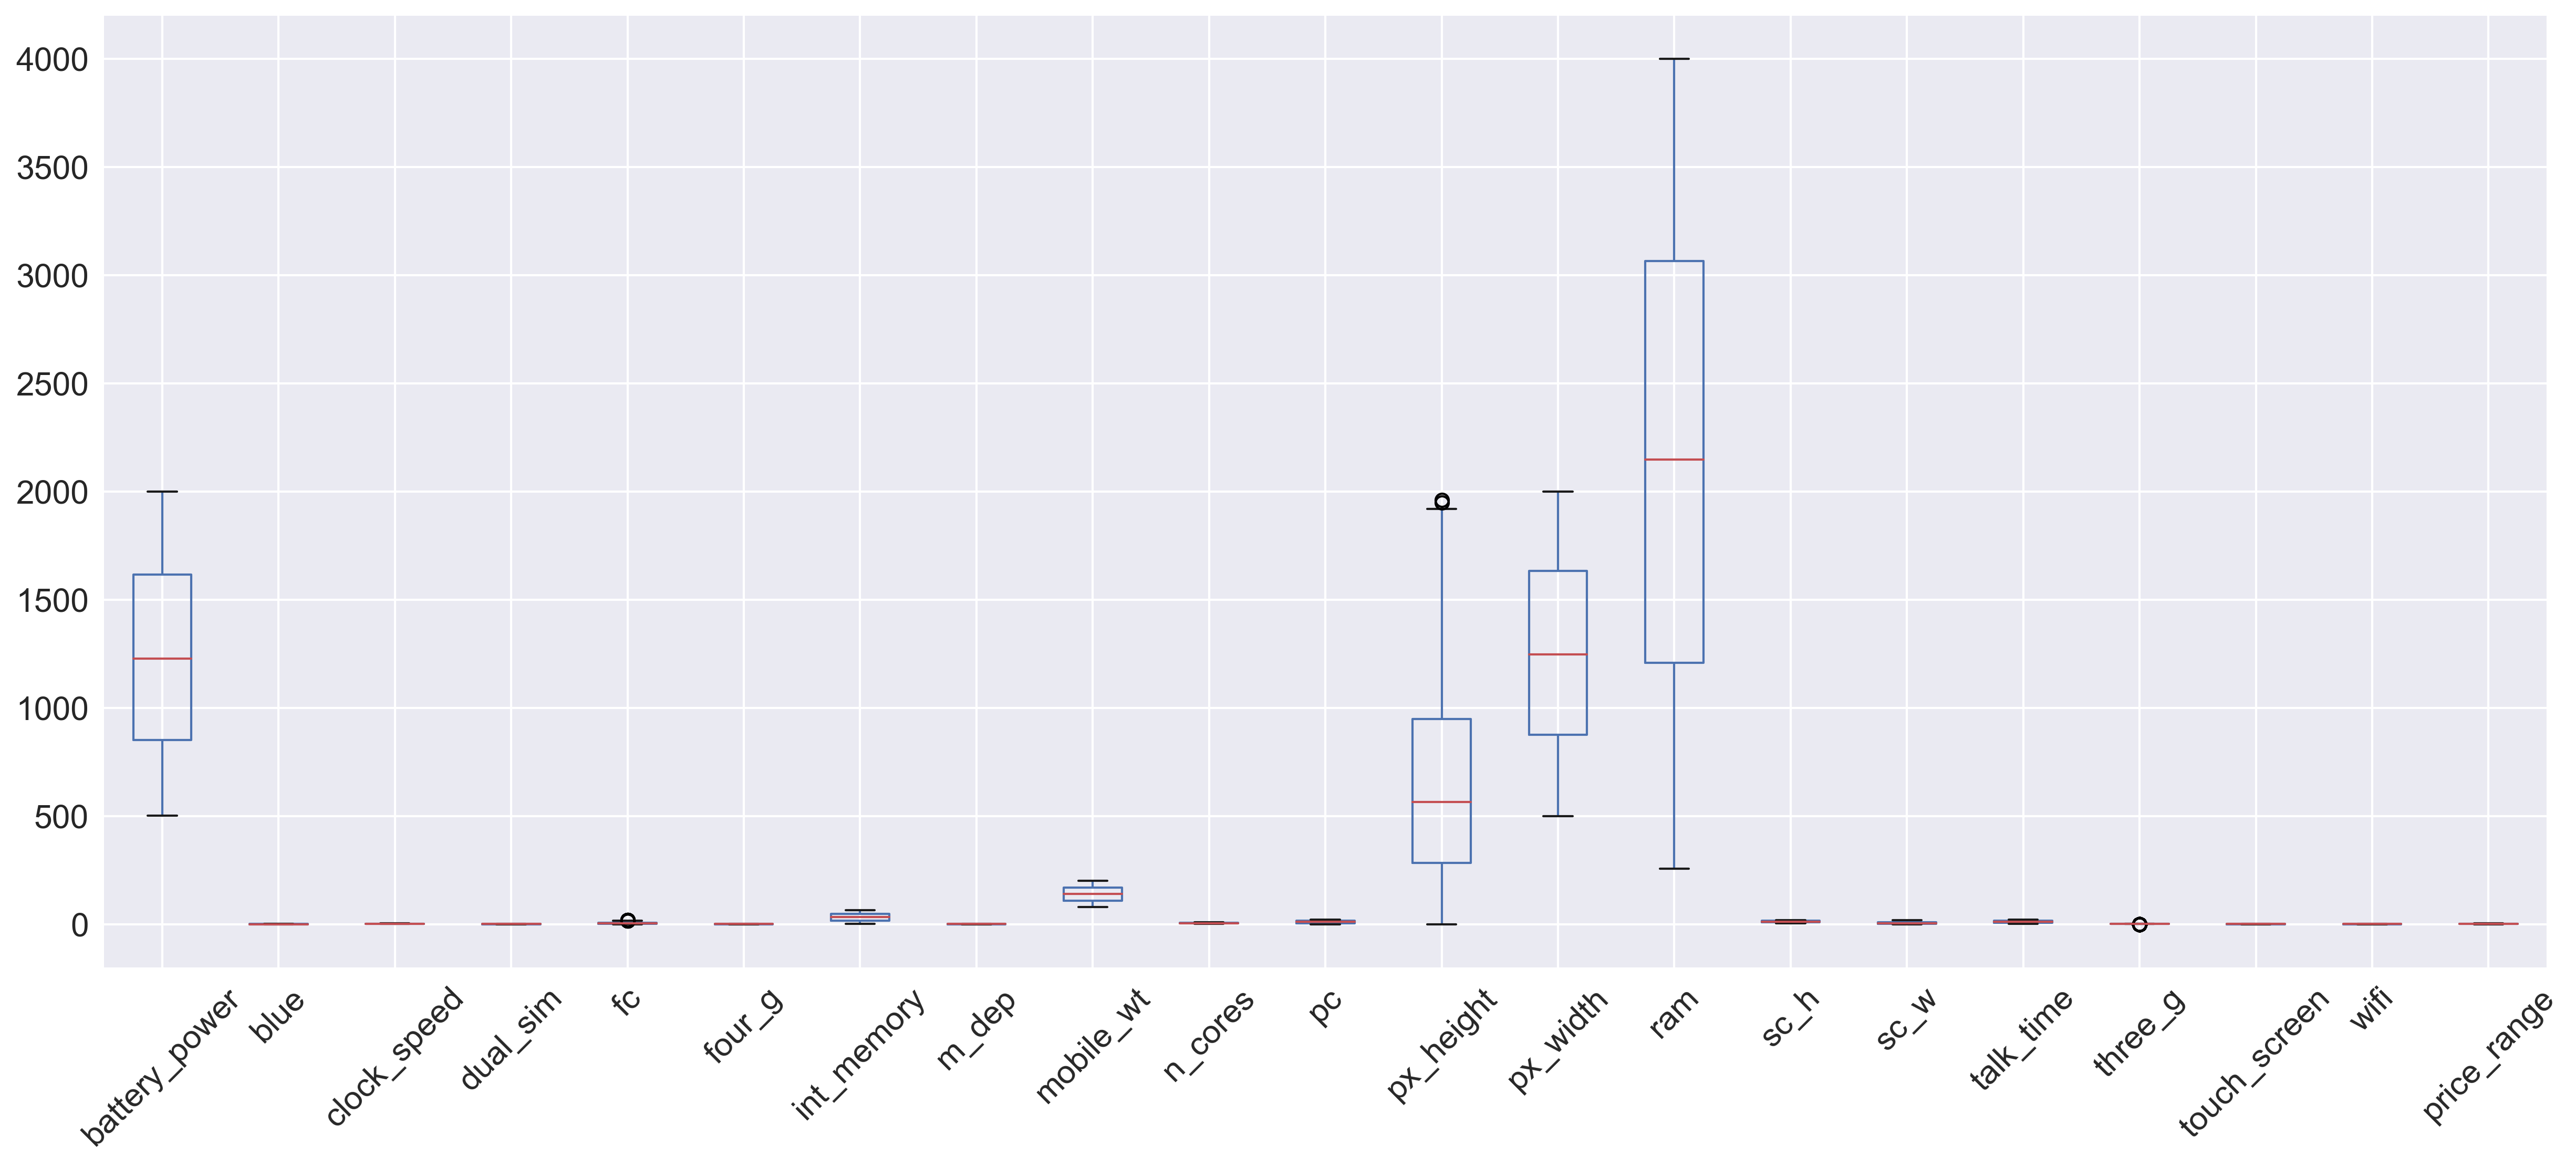

In [355]:
fig=plt.figure(figsize=[20,8],dpi=300)
data.boxplot(fontsize=15)
plt.xticks(rotation=45)
plt.show()

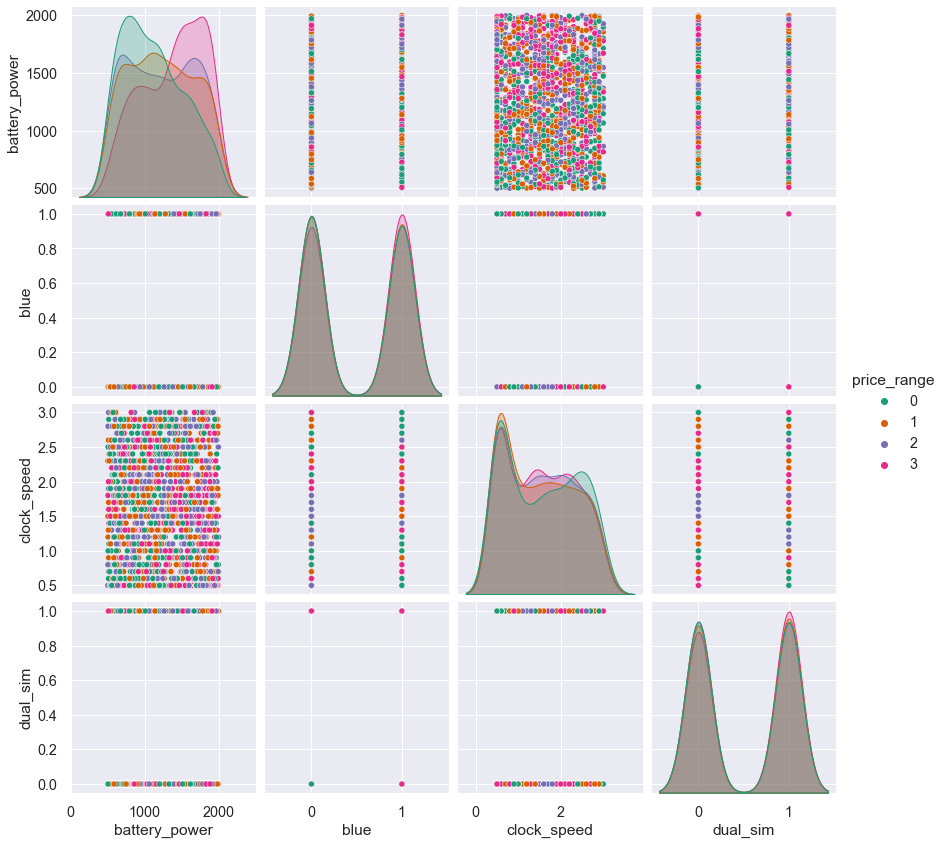

In [356]:
sns.set(font_scale=1.3)
sns.pairplot(
    data,
    x_vars=['battery_power','blue','clock_speed','dual_sim'],
    y_vars=['battery_power','blue','clock_speed','dual_sim'],height=50,hue='price_range',palette='Dark2',size=3
)



plt.show()

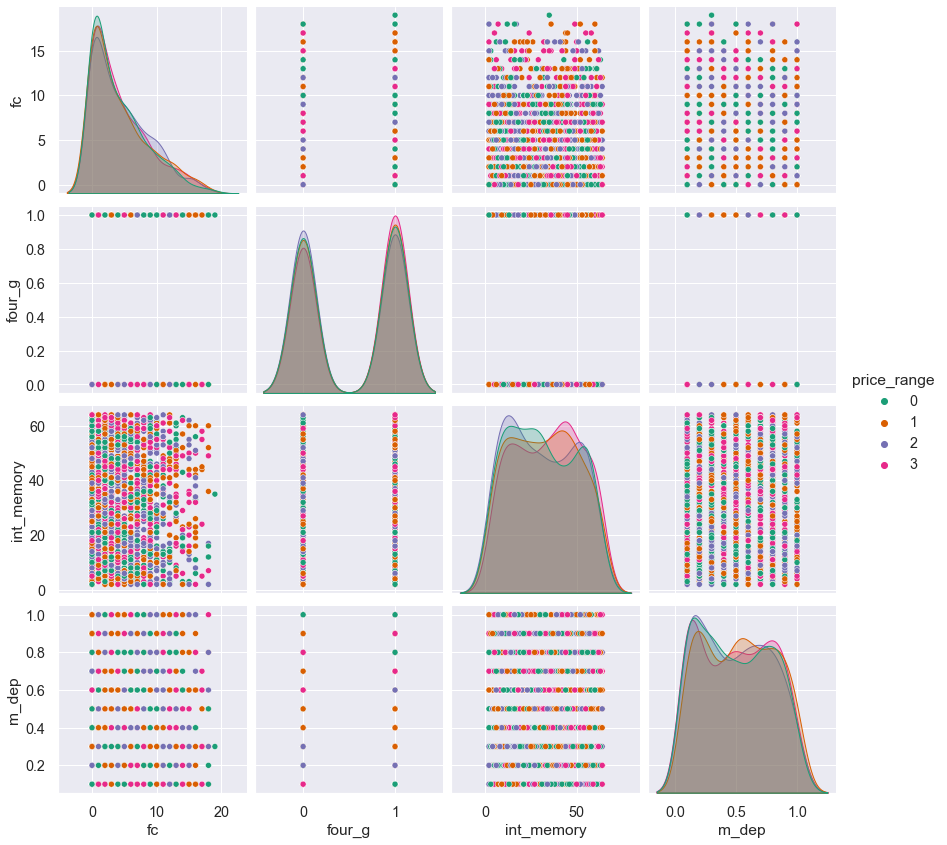

In [357]:
sns.set(font_scale=1.3)
sns.pairplot(
    data,
    x_vars=['fc','four_g','int_memory','m_dep'],
    y_vars=['fc','four_g','int_memory','m_dep'],height=4,hue='price_range',palette='Dark2',size=3
)
plt.show()

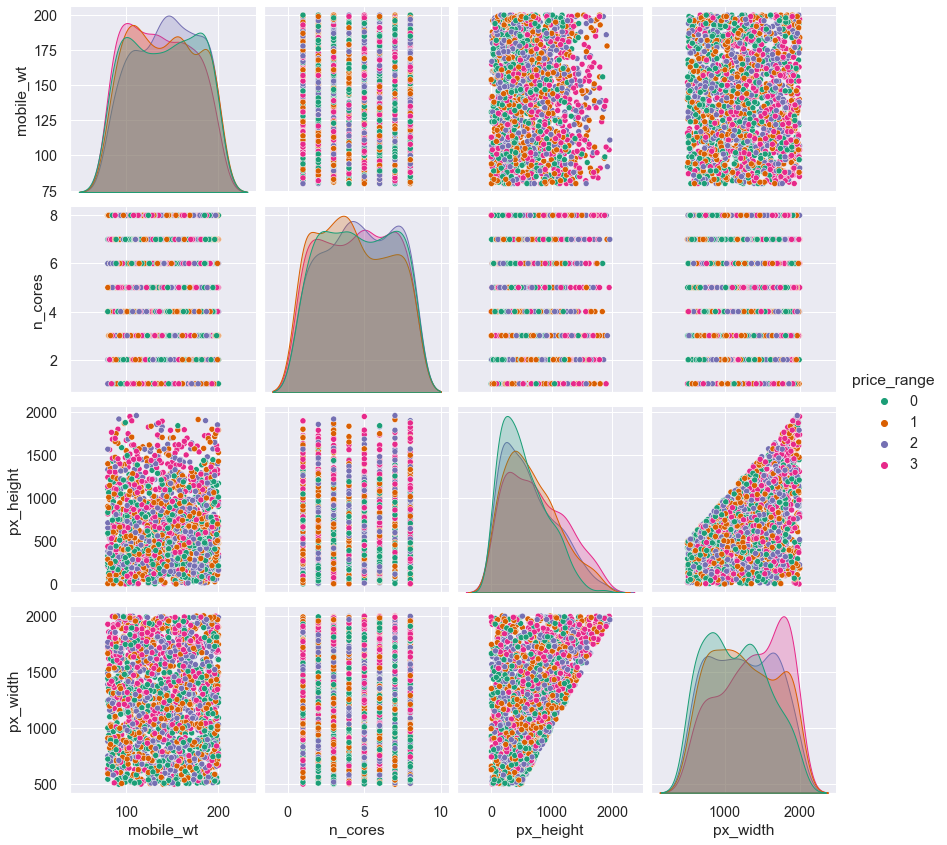

In [358]:
sns.set(font_scale=1.3)
sns.pairplot(
    data,
    x_vars=['mobile_wt','n_cores','px_height','px_width'],
    y_vars=['mobile_wt','n_cores','px_height','px_width'],height=4,hue='price_range',palette='Dark2',size=3
)


plt.show()

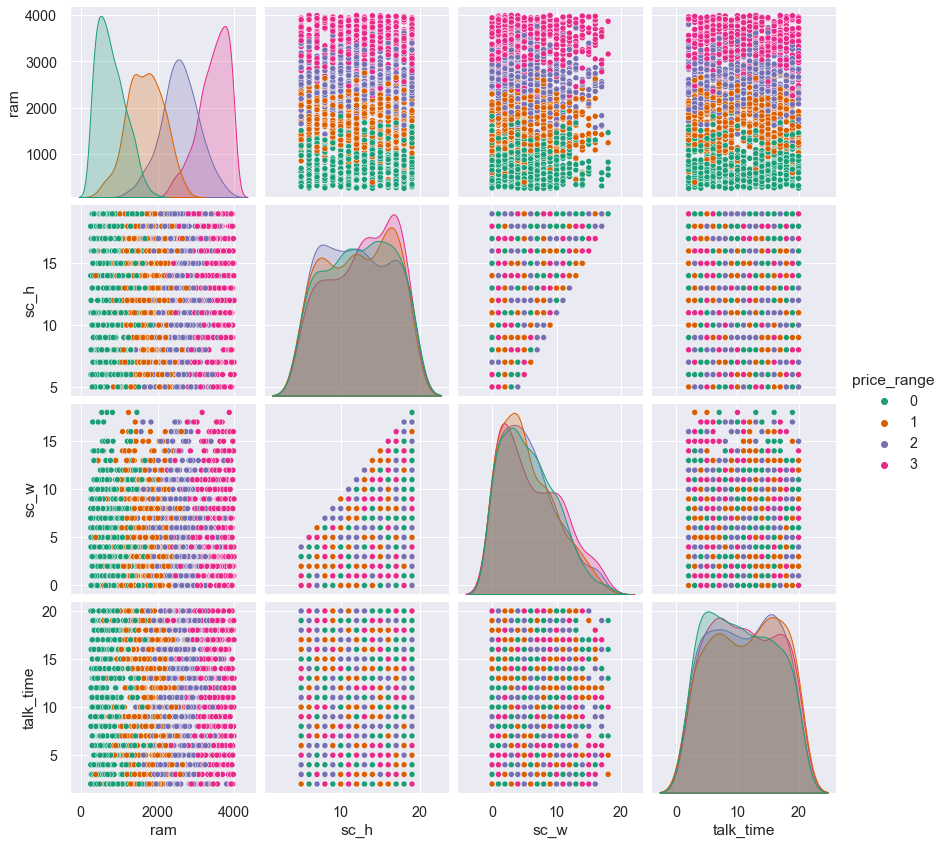

In [359]:
sns.set(font_scale=1.3)
sns.pairplot(
    data,
    x_vars=['ram','sc_h','sc_w','talk_time'],
    y_vars=['ram','sc_h','sc_w','talk_time'],height=4,hue='price_range',palette='Dark2',size=3
)

plt.show()

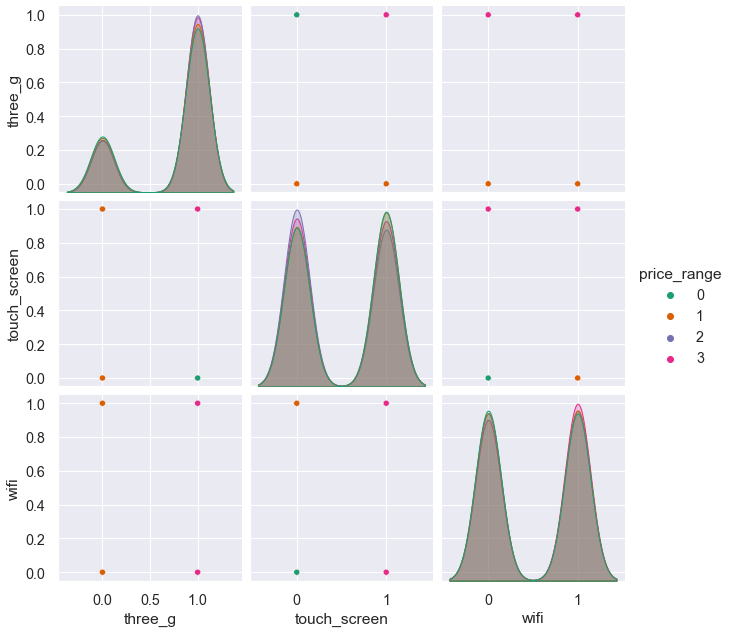

In [360]:
sns.set(font_scale=1.3)
sns.pairplot(
    data,
    x_vars=['three_g','touch_screen','wifi'],
    y_vars=['three_g','touch_screen','wifi'],height=4,hue='price_range',palette='Dark2',size=3
)

plt.show()

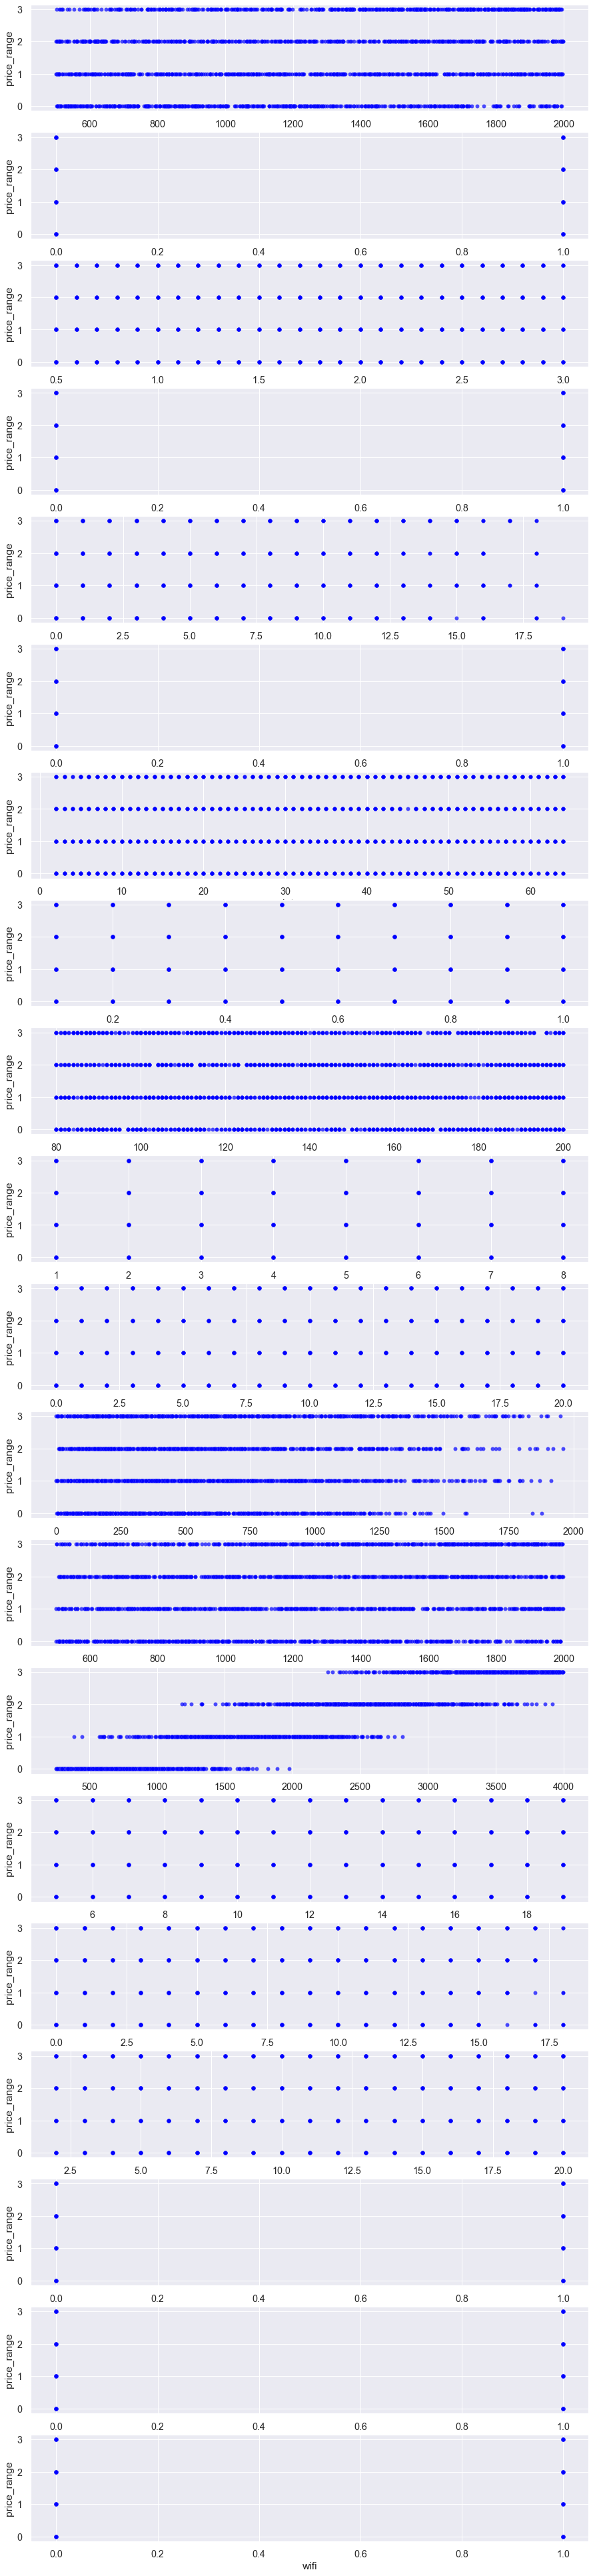

In [361]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(20, figsize=(15,70))

ax[0].scatter(x = data['battery_power'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[0].set_xlabel("battery_power")
ax[0].set_ylabel("price_range")


ax[1].scatter(x = data['blue'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[1].set_xlabel("blue")
ax[1].set_ylabel("price_range")

ax[2].scatter(x = data['clock_speed'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[2].set_xlabel("clock_speed")
ax[2].set_ylabel("price_range")

ax[3].scatter(x = data['dual_sim'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[3].set_xlabel("dual_sim")
ax[3].set_ylabel("price_range")

ax[4].scatter(x = data['fc'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[4].set_xlabel("fc")
ax[4].set_ylabel("price_range")

ax[5].scatter(x = data['four_g'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[5].set_xlabel("four_g")
ax[5].set_ylabel("price_range")

ax[6].scatter(x = data['int_memory'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[6].set_xlabel("int_memory")
ax[6].set_ylabel("price_range")

ax[7].scatter(x = data['m_dep'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[7].set_xlabel("m_dep")
ax[7].set_ylabel("price_range")

ax[8].scatter(x = data['mobile_wt'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[8].set_xlabel("mobile_wt")
ax[8].set_ylabel("price_range")

ax[9].scatter(x = data['n_cores'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[9].set_xlabel("n_cores")
ax[9].set_ylabel("price_range")

ax[10].scatter(x = data['pc'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[10].set_xlabel("pc")
ax[10].set_ylabel("price_range")

ax[11].scatter(x = data['px_height'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[11].set_xlabel("px_height")
ax[11].set_ylabel("price_range")

ax[12].scatter(x = data['px_width'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[12].set_xlabel("px_width")
ax[12].set_ylabel("price_range")

ax[13].scatter(x = data['ram'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[13].set_xlabel("ram")
ax[13].set_ylabel("price_range")

ax[14].scatter(x = data['sc_h'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[14].set_xlabel("sc_h")
ax[14].set_ylabel("price_range")

ax[15].scatter(x = data['sc_w'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[15].set_xlabel("sc_w")
ax[15].set_ylabel("price_range")

ax[16].scatter(x = data['talk_time'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[16].set_xlabel("talk_time")
ax[16].set_ylabel("price_range")

ax[17].scatter(x = data['three_g'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[17].set_xlabel("three_g")
ax[17].set_ylabel("price_range")

ax[18].scatter(x = data['touch_screen'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[18].set_xlabel("touch_screen")
ax[18].set_ylabel("price_range")


ax[19].scatter(x = data['wifi'], y = data['price_range'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[19].set_xlabel("wifi")
ax[19].set_ylabel("price_range")



plt.show()

In [362]:
data.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

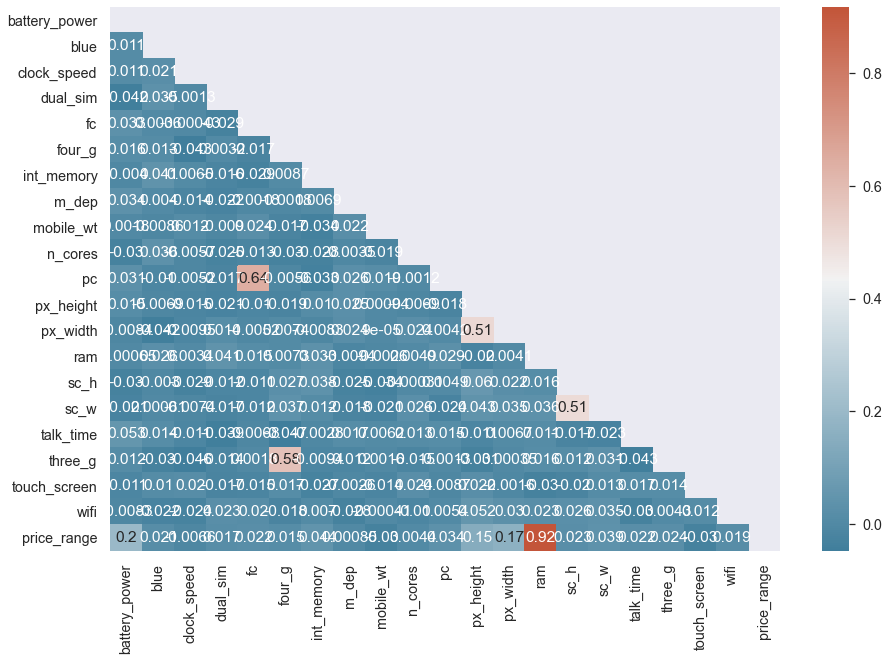

In [363]:
sns.set(font_scale=1.3)
corr = data.corr()
f, ax = plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

In [364]:
# الگوریتم دسیژن تری

In [365]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [366]:
x=pd.DataFrame(data, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
y=data.price_range.values.reshape(-1,1)



In [367]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [368]:
dec=DecisionTreeClassifier(max_depth=6)
dec=dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)


In [369]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.86


In [370]:
print(confusion_matrix(y_test,y_pred))

[[117  18   0   0]
 [ 11 128  10   0]
 [  0  19 133  16]
 [  0   0  10 138]]


In [371]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       135
           1       0.78      0.86      0.82       149
           2       0.87      0.79      0.83       168
           3       0.90      0.93      0.91       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [372]:
text_=tree.export_text(dec)
print(text_)

|--- feature_13 <= 2235.50
|   |--- feature_13 <= 1082.50
|   |   |--- feature_11 <= 1441.00
|   |   |   |--- feature_0 <= 1804.00
|   |   |   |   |--- feature_6 <= 63.50
|   |   |   |   |   |--- feature_11 <= 1245.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  1245.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  63.50
|   |   |   |   |   |--- feature_14 <= 13.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_14 >  13.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1804.00
|   |   |   |   |--- feature_12 <= 1538.50
|   |   |   |   |   |--- feature_13 <= 771.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  771.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_12 >  1538.50
|   |   |   |   |   |--- feature_6 <= 17.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  17.00
|   |   |   |   |   |   |--- class:

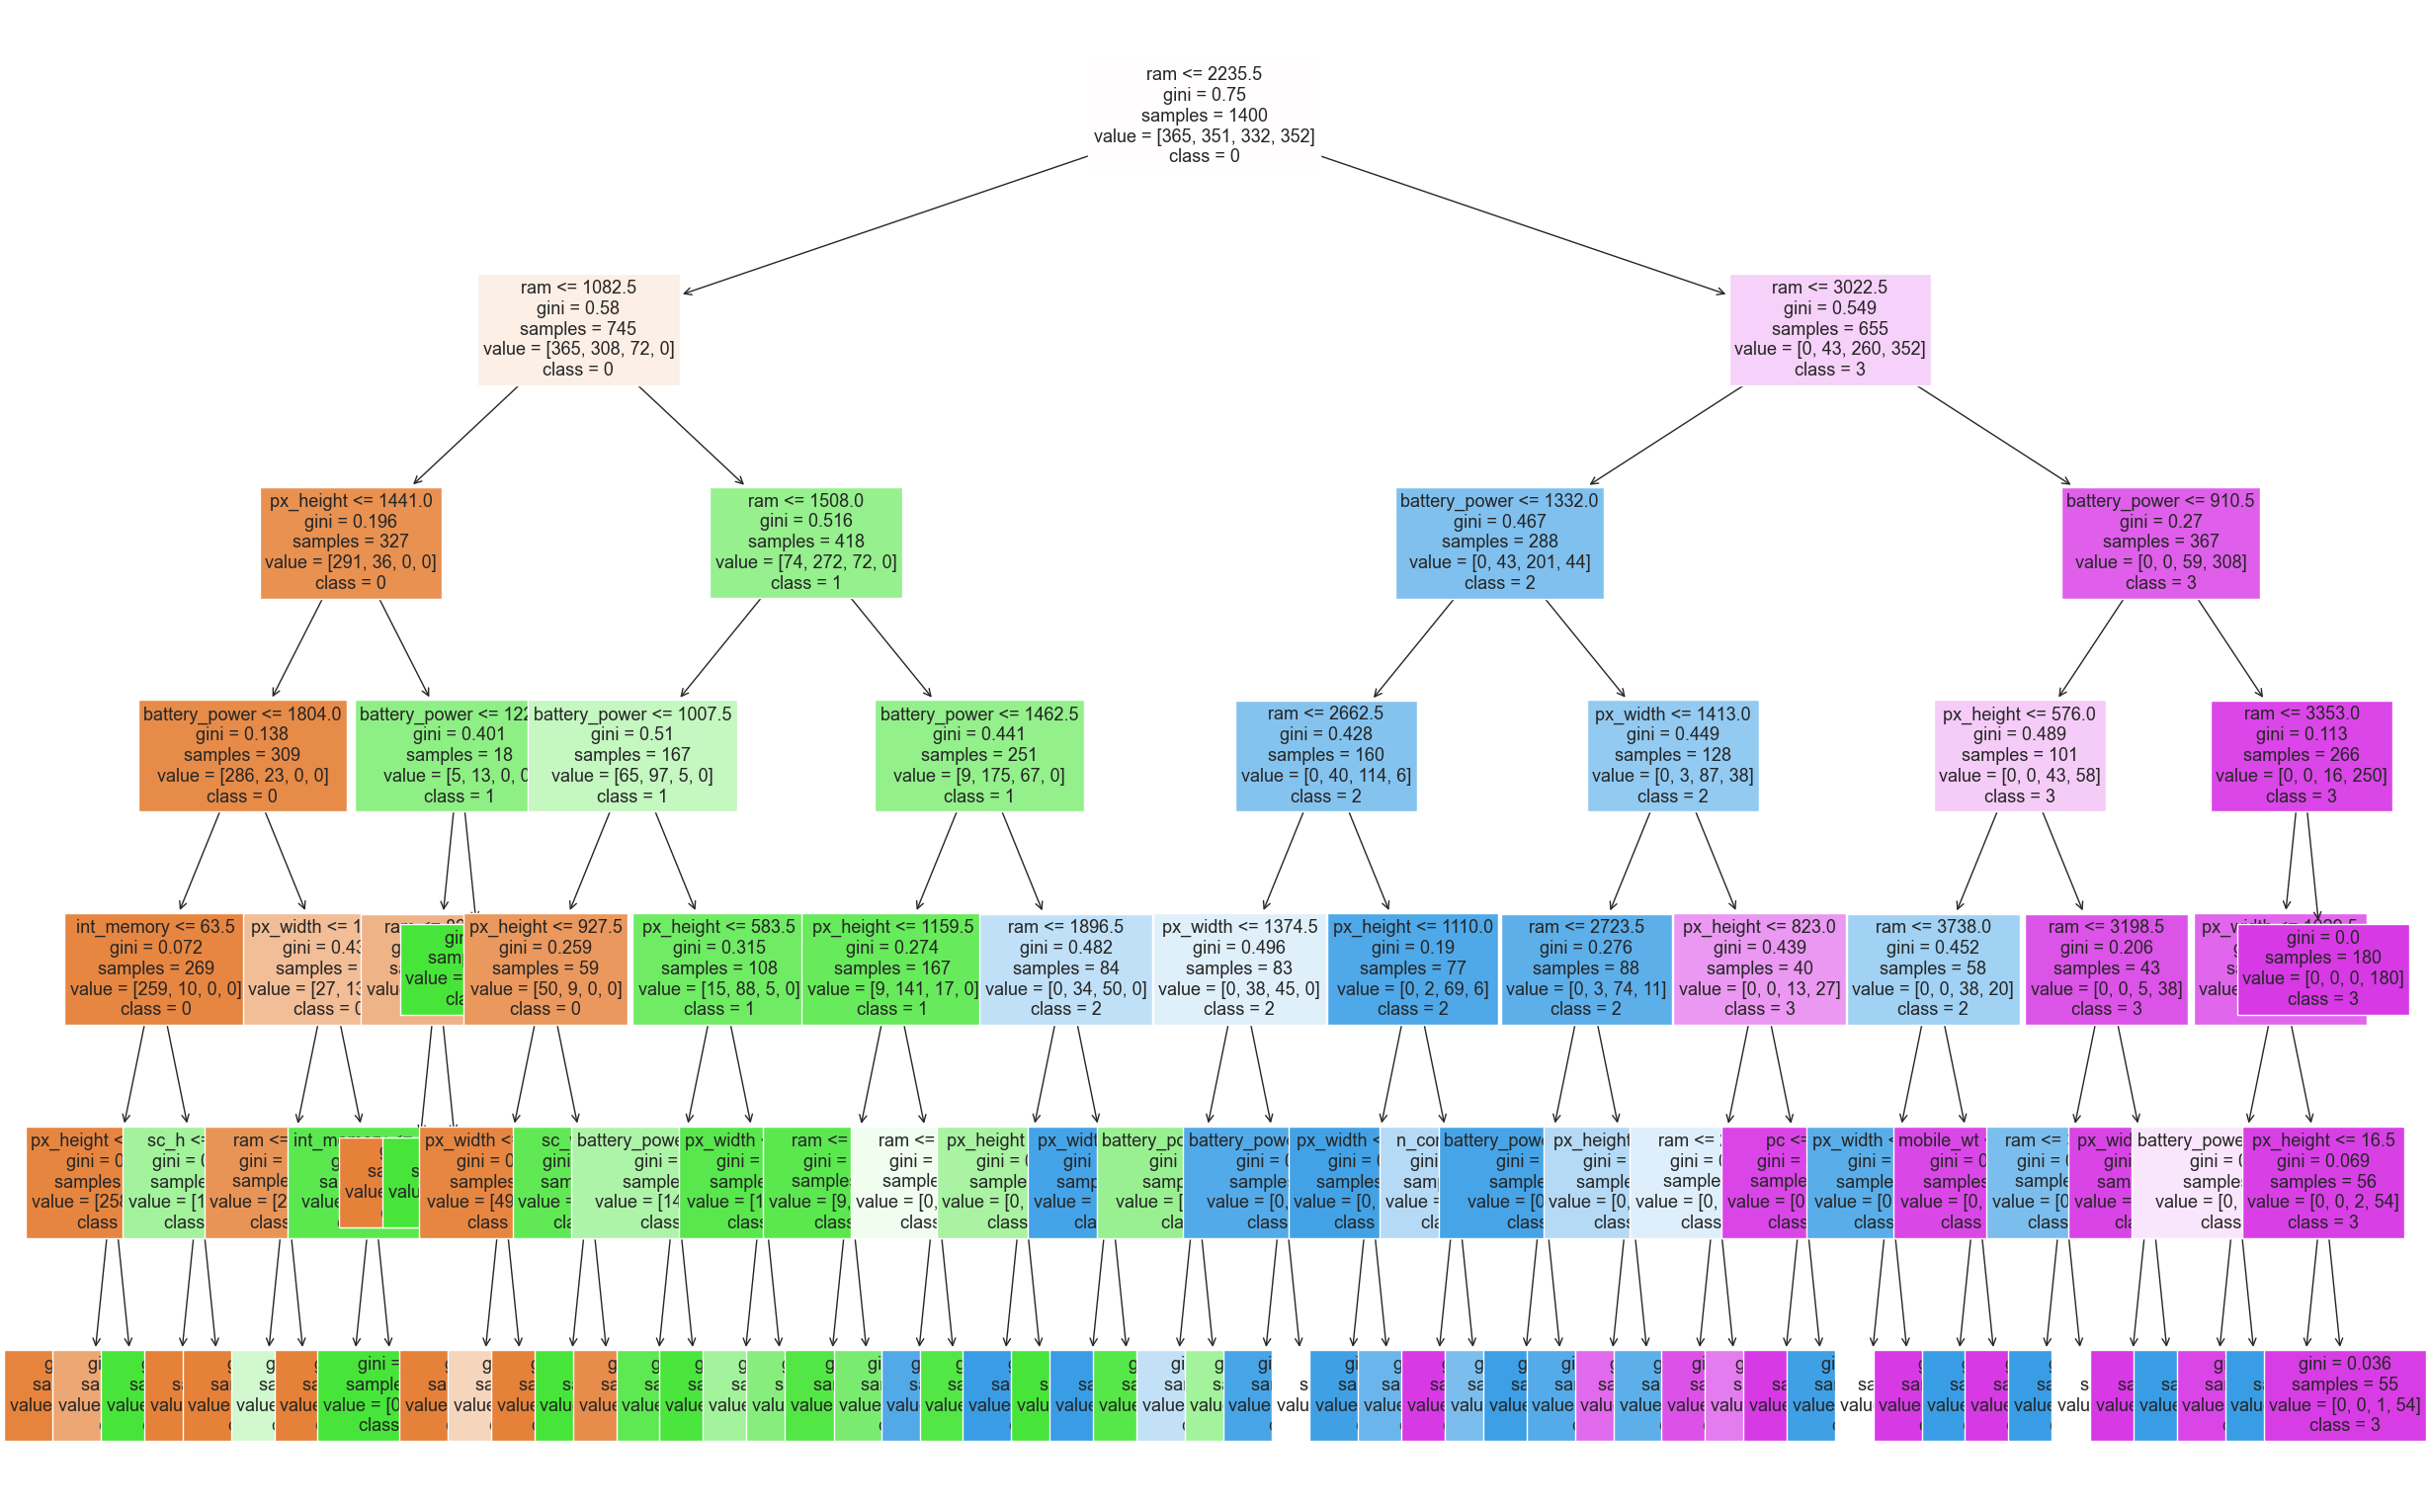

In [373]:
with open ('decistion_tree.log','w') as fout:
    fout.write(text_)
    
    
x_name=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
y_name=['0','1','2','3']

fig=plt.figure(figsize=(30,20),dpi=100)

plot=tree.plot_tree(dec,fontsize=13,
feature_names=x_name,
class_names=y_name,
filled=True)
fig.savefig('Treel.png')


In [374]:
#اضافه کردن ديتاست تست به کل ديتاي پروژه و انجام دادن پيش بيني

In [375]:
df1=data.append(data_test)

In [376]:
df1.fillna(method='pad',axis=0,inplace=True)
df1

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              842     0          2.2         0   1       0           7   
1             1021     1          0.5         1   0       1          53   
2              563     1          0.5         1   2       1          41   
3              615     1          2.5         0   0       0          10   
4             1821     1          1.2         0  13       1          44   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.6        188        2  ...         20       756  2549     9     7   
1      0.7        136        3  ...        905      1988  2631    17     3   
2      0.9        145        5  ...       1263      1716  2603    11     2   
3      0.8        131        6  ...       1216      1786  2769    16     8   
4      0.6        141        2  ...       1208      1212  1411     8     2   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0           19        0             0     1          1.0  
1            7        1             1     0          2.0  
2            9        1             1     0          2.0  
3           11        1             0     0          2.0  
4           15        1             1     0          1.0  
..         ...      ...           ...   ...          ...  
995         15        1             1     0          3.0  
996         19        0             1     1          3.0  
997         14        1             0     0          3.0  
998          6        0             1     0          3.0  
999          3        1             0     1          3.0  

[3000 rows x 21 columns]

In [377]:
x_train=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][:2000]
y_train=df1[['price_range']][:2000].values.reshape(-1,1)



In [378]:
x_test=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][2000:]

In [379]:
dec1=DecisionTreeClassifier(max_depth=6)
dec1.fit(x_train,y_train)
y_pred1=dec1.predict(x_test)

In [380]:
y_pred1

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 1., 2.,
       0., 3., 2., 0., 2., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 2., 0., 2., 1., 1., 1., 2.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 1., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 1., 1., 2., 1., 3., 1., 0.,
       0., 3., 1., 2., 0., 1., 2., 3., 3., 2., 1., 3., 3., 3., 3., 1., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 3., 3., 1., 0., 2., 1., 1., 3., 0.,
       2., 0., 3., 2., 1., 3., 2., 3., 2., 3., 3., 2., 2., 3., 3., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 0., 0., 1., 1., 0., 1., 2., 0., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 0., 0., 3., 1., 1., 2., 2., 2., 3., 1., 2., 3., 3.,
       3., 2., 2., 1., 0., 0., 1., 2., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       2., 3., 1., 0., 1.

In [381]:
# الگوریتم رندوم فارست

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
x=pd.DataFrame(data, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
y=data.price_range.values.reshape(-1,1)



In [384]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [385]:
r_f=RandomForestClassifier(n_estimators=4400,max_depth=11)
r_f.fit(x_train,y_train)
y_pred_rf=r_f.predict(x_test)


In [386]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred_rf))

Accuracy 0.8816666666666667


In [387]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       135
           1       0.83      0.84      0.83       149
           2       0.86      0.83      0.85       168
           3       0.93      0.93      0.93       148

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [388]:
#اضافه کردن ديتاست تست به کل ديتاي پروژه و انجام دادن پيش بيني

In [389]:
x_train=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][:2000]
y_train=df1[['price_range']][:2000].values.reshape(-1,1)



In [390]:
x_test=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][2000:]

In [391]:
r_f1=RandomForestClassifier(n_estimators=4400,max_depth=11)
r_f1.fit(x_train,y_train)
y_pred_rf1=r_f1.predict(x_test)


In [392]:
y_pred_rf1

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 2., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 2., 0., 1., 1., 1., 1., 3.,
       1., 1., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 1., 2., 0., 2., 1., 0., 2., 1., 2., 1., 0.,
       0., 3., 1., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 1., 3.,
       0., 0., 3., 2., 1., 1., 0., 3., 2., 3., 1., 0., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 3., 2., 3., 0.,
       0., 2., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 2., 3., 1., 2., 3., 3.,
       3., 1., 2., 1., 0., 0., 1., 3., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       2., 3., 0., 0., 1.

In [393]:
#SVM الگوریتم 

In [394]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [395]:
x=pd.DataFrame(data, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
y=data.price_range.values.reshape(-1,1)


In [396]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [397]:
svm1=SVC()
svm1.fit(x_train,y_train)
pred_svm=svm1.predict(x_test)

In [398]:
print("Accuracy",metrics.accuracy_score(y_test,pred_svm))

Accuracy 0.97


In [399]:
print(confusion_matrix(y_test,pred_svm))

[[139   3   0   0]
 [  4 151   1   0]
 [  0   6 137   2]
 [  0   0   2 155]]


In [400]:
print(classification_report(y_test,pred_svm))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       142
           1       0.94      0.97      0.96       156
           2       0.98      0.94      0.96       145
           3       0.99      0.99      0.99       157

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [401]:
# svm بدست آوردن بهترين مقادير پارامترهاي الگوريتم 
#بخاطر زمان بسيار زياد اجراي کد تمام پارامترها نوشته نشده

In [402]:
best_grid={'C':[0.1,1,],
           'gamma':[1000,100,],
           'kernel':['linear']
          }

In [403]:
from sklearn.model_selection import GridSearchCV

In [404]:
grid=GridSearchCV(SVC(),best_grid,refit=True,verbose=3)

In [405]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............C=0.1, gamma=1000, kernel=linear; total time=   1.0s
[CV 2/5] END ...............C=0.1, gamma=1000, kernel=linear; total time=   2.2s
[CV 3/5] END ...............C=0.1, gamma=1000, kernel=linear; total time=   2.6s
[CV 4/5] END ...............C=0.1, gamma=1000, kernel=linear; total time=   1.4s
[CV 5/5] END ...............C=0.1, gamma=1000, kernel=linear; total time=   0.8s
[CV 1/5] END ................C=0.1, gamma=100, kernel=linear; total time=   1.0s
[CV 2/5] END ................C=0.1, gamma=100, kernel=linear; total time=   2.2s
[CV 3/5] END ................C=0.1, gamma=100, kernel=linear; total time=   2.7s
[CV 4/5] END ................C=0.1, gamma=100, kernel=linear; total time=   1.4s
[CV 5/5] END ................C=0.1, gamma=100, kernel=linear; total time=   0.8s
[CV 1/5] END .................C=1, gamma=1000, kernel=linear; total time=   5.3s
[CV 2/5] END .................C=1, gamma=1000, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1000, 100],
                         'kernel': ['linear']},
             verbose=3)

In [406]:
grid.best_params_

{'C': 0.1, 'gamma': 1000, 'kernel': 'linear'}

In [407]:
grid.best_estimator_

SVC(C=0.1, gamma=1000, kernel='linear')

In [408]:
grid_pred=grid.predict(x_test)

In [409]:
print("Accuracy",metrics.accuracy_score(y_test,grid_pred))

Accuracy 0.9783333333333334


In [410]:
print(classification_report(y_test,grid_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       142
           1       0.96      0.99      0.97       156
           2       0.99      0.94      0.96       145
           3       0.97      0.99      0.98       157

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [411]:
print(confusion_matrix(y_test,grid_pred))

[[139   3   0   0]
 [  0 155   1   0]
 [  0   4 137   4]
 [  0   0   1 156]]


In [412]:
#اضافه کردن ديتاست تست به کل ديتاي پروژه و انجام دادن پيش بيني

In [413]:
x_train=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][:2000]
y_train=df1[['price_range']][:2000].values.reshape(-1,1)



In [414]:
x_test=df1[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc'
           ,'px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']][2000:]

In [415]:
svm2=SVC()
svm2.fit(x_train,y_train)
pred_svm2=svm2.predict(x_test)

In [416]:
pred_svm2

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 0., 2.,
       1., 3., 2., 1., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       1., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 1., 3., 3., 3., 0., 1., 1., 1., 1., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 0., 2., 3., 0., 3., 3., 0., 3.,
       0., 3., 1., 3., 0., 1., 2., 2., 1., 2., 2., 0., 2., 1., 2., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 3., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 2., 3., 1., 0., 2., 1., 1., 3., 1.,
       1., 0., 3., 2., 1., 2., 1., 2., 2., 3., 3., 3., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 1., 0., 3., 0.,
       0., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 0., 0., 1., 1., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 3., 3., 1., 2., 3., 2.,
       3., 2., 2., 1., 0., 0., 1., 3., 0., 2., 3., 3., 0., 2., 0., 3., 2.,
       3., 3., 1., 0., 1.